# Major_Project(ML041B3)

### Name: Naveena Kota

#### OBJECTIVE: To predict the price of a used cars

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing datasets and Exploring

In [2]:
data_train=pd.read_excel('Data_Train.xlsx')
data_test=pd.read_excel('Data_Test.xlsx')

In [3]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [5]:
data_train.shape

(6019, 12)

In [6]:
data_test.shape

(1234, 11)

In [7]:
data_train.isna().sum() #There are few null values in the given dataset 

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
data_test.isna().sum() 

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

#### There are few missing values in some columns

# Cleaning the Data

In [9]:
print(data_train.Transmission.unique())
print(data_test.Transmission.unique())

['Manual' 'Automatic']
['Manual' 'Automatic']


In [10]:
print(data_train.Fuel_Type.unique())
print(data_test.Fuel_Type.unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['CNG' 'Petrol' 'Diesel' 'LPG']


In [11]:
print(data_train.Owner_Type.unique())
print(data_test.Owner_Type.unique())

['First' 'Second' 'Fourth & Above' 'Third']
['First' 'Second' 'Third' 'Fourth & Above']


In [12]:
print(data_train.Location.unique())
print(data_test.Location.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['Delhi' 'Coimbatore' 'Mumbai' 'Hyderabad' 'Pune' 'Jaipur' 'Chennai'
 'Kochi' 'Bangalore' 'Kolkata' 'Ahmedabad']


##### "Transmission","Fuel_type","Owner_Type" are Label Encoded
##### "Location" is One-Hot-Encoded

In [13]:
owner = {"First":1, "Second":2, "Third":3, "Fourth & Above":4}
data_train.Owner_Type = [owner[i] for i in data_train.Owner_Type]
data_test.Owner_Type = [owner[i] for i in data_test.Owner_Type]
trans = {"Manual":0, "Automatic":1}
data_train.Transmission = [trans[i] for i in data_train.Transmission]
data_test.Transmission = [trans[i] for i in data_test.Transmission]
fuel = {"Diesel":0, "Petrol":1, "CNG":3, "LPG":4, "Electric":5} #Ordered on the Basis of Efficiency of the Fuel
data_train.Fuel_Type = [fuel[i] for i in data_train.Fuel_Type]
data_test.Fuel_Type = [fuel[i] for i in data_test.Fuel_Type]

In [14]:
name = data_train['Name']
array = []
for k in range(len(name)):
    array = list(name[k].split(' ',3))
    data_train.loc[k,'Brand'] = str(array[0])
    data_train.loc[k,'Model'] = str(array[1])
    data_train.loc[k,'Ver'] = str(array[2])
data_train = data_train.drop(columns = ['Name'])

In [15]:
name = data_test['Name']
array = []
for k in range(len(name)):
    array = list(name[k].split(' ',3))
    if(len(array) <=3):
      array.append("null")
    data_test.loc[k,'Brand'] = (array[0])
    data_test.loc[k,'Model'] = (array[1])
    data_test.loc[k,'Ver'] = (array[2])
data_test = data_test.drop(columns = ['Name'])

In [16]:
data_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ver
0,Mumbai,2010,72000,3,0,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R
1,Pune,2015,41000,0,0,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6
2,Chennai,2011,46000,1,0,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,0,0,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,0,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New


In [17]:
# Removing the units of 'Mileage','Engine','Power'

In [18]:
columns = {'Mileage','Engine','Power'}
for i in columns:
    #for Train data
    array0 = data_train[i].str.split(" ",expand=True)
    data_train[i] = pd.to_numeric(array0[0],errors='coerce')
    #for Test data
    array1 = data_test[i].str.split(" ",expand=True)
    data_test[i] = pd.to_numeric(array1[0],errors='coerce')

In [19]:
data_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ver
0,Mumbai,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R
1,Pune,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6
2,Chennai,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New


In [20]:
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Ver
0,Delhi,2014,40929,3,0,1,32.26,998.0,58.20,4.0,Maruti,Alto,K10
1,Coimbatore,2013,54493,1,0,2,24.70,796.0,47.30,5.0,Maruti,Alto,800
2,Mumbai,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,Toyota,Innova,Crysta
3,Hyderabad,2012,139000,0,0,1,23.59,1364.0,NaN,5.0,Toyota,Etios,Liva
4,Mumbai,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,Hyundai,i20,Magna


##### Label encoding for 'Brand','Model','Ver'

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['Brand'] = le.fit_transform(data_train['Brand'])
data_test['Brand'] = data_test['Brand'].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
data_test['Brand'] = le.transform(data_test['Brand'])

In [22]:
le = LabelEncoder()
data_train['Model'] = le.fit_transform(data_train['Model'])
data_test['Model'] = data_test['Model'].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
data_test['Model'] = le.transform(data_test['Model'])

In [23]:
le = LabelEncoder()
data_train['Ver'] = le.fit_transform(data_train['Ver'])
data_test['Ver'] = data_test['Ver'].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
data_test['Ver'] = le.transform(data_test['Ver'])

In [24]:
data_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ver
0,Mumbai,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,18,189,231
1,Pune,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,10,53,10
2,Chennai,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,9,99,280
3,Chennai,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,18,69,286
4,Coimbatore,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,1,10,221


In [25]:
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Ver
0,Delhi,2014,40929,3,0,1,32.26,998.0,58.20,4.0,18,16,187
1,Coimbatore,2013,54493,1,0,2,24.70,796.0,47.30,5.0,18,16,82
2,Mumbai,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,28,98,122
3,Hyderabad,2012,139000,0,0,1,23.59,1364.0,NaN,5.0,28,72,204
4,Mumbai,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,10,210,213


##### Onehotencoding of 'Location'

In [26]:
data_train['Location'] = data_train['Location'].astype('category')
data_train= pd.get_dummies(data_train, sparse=False, dtype='int64')
data_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,...,0,0,1,0,0,0,0,0,0,0


In [27]:
data_test['Location'] = data_test['Location'].astype('category')
data_test = pd.get_dummies(data_test, sparse=False, dtype='int64')
data_test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2014,40929,3,0,1,32.26,998.0,58.20,4.0,18,...,0,0,0,1,0,0,0,0,0,0
1,2013,54493,1,0,2,24.70,796.0,47.30,5.0,18,...,0,0,1,0,0,0,0,0,0,0
2,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,28,...,0,0,0,0,0,0,0,0,1,0
3,2012,139000,0,0,1,23.59,1364.0,NaN,5.0,28,...,0,0,0,0,1,0,0,0,0,0
4,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,10,...,0,0,0,0,0,0,0,0,1,0


# Data Filling

In [28]:
data_train.isna().sum() 

Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  2
Engine                  36
Power                  143
Seats                   42
Price                    0
Brand                    0
Model                    0
Ver                      0
Location_Ahmedabad       0
Location_Bangalore       0
Location_Chennai         0
Location_Coimbatore      0
Location_Delhi           0
Location_Hyderabad       0
Location_Jaipur          0
Location_Kochi           0
Location_Kolkata         0
Location_Mumbai          0
Location_Pune            0
dtype: int64

In [29]:
data_test.isna().sum() 

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  32
Seats                  11
Brand                   0
Model                   0
Ver                     0
Location_Ahmedabad      0
Location_Bangalore      0
Location_Chennai        0
Location_Coimbatore     0
Location_Delhi          0
Location_Hyderabad      0
Location_Jaipur         0
Location_Kochi          0
Location_Kolkata        0
Location_Mumbai         0
Location_Pune           0
dtype: int64

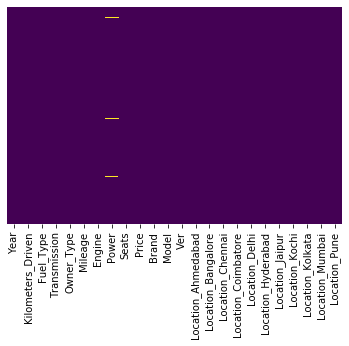

In [30]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#The yellow lines indicate the null values

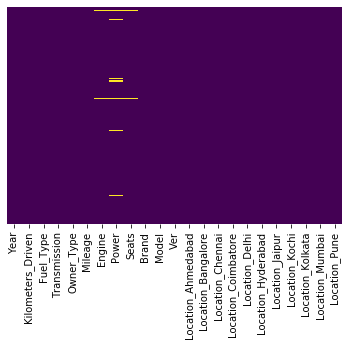

In [31]:
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### The rows having null values are dropped

In [32]:
data_train.dropna(how='any',inplace=True)

In [33]:
data_train.shape

(5872, 24)

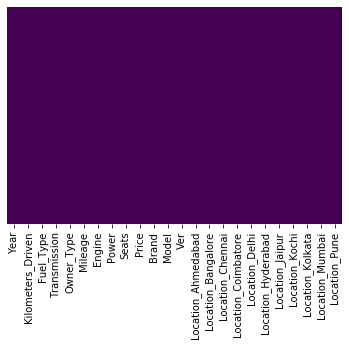

In [34]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
data_test.dropna(how='any', inplace=True)

In [36]:
data_test.shape

(1201, 23)

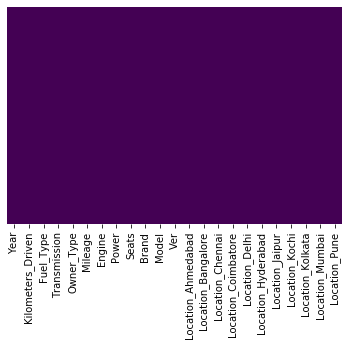

In [37]:
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Visualization

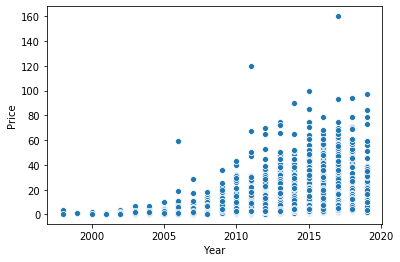

In [38]:
sns.scatterplot(x='Year',y='Price',data=data_train)

#As the 'Year' increases 'Price' also increases

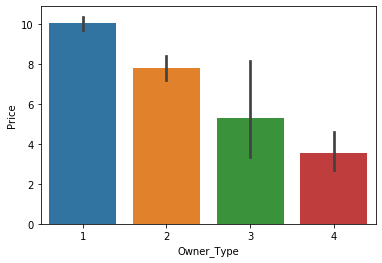

In [39]:
sns.barplot(x='Owner_Type',y='Price', data=data_train)

<Figure size 720x432 with 0 Axes>

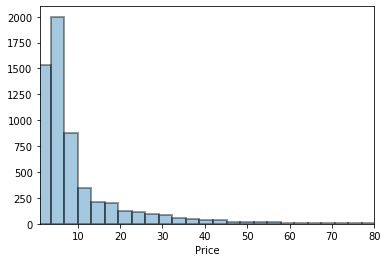

In [40]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
sns.distplot(data_train['Price'],kde=False, bins=50,hist_kws=dict(edgecolor="k", linewidth=2),ax=ax)
ax.set_xlim(1,80)
plt.show()


# distplot on 'Price'
# Maximum number of cars have the price in a range between 0 and 10 lacs

# Training and Testing

In [41]:
data_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,0,0,1,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,1,0,1,18.20,1199.0,88.70,5.0,4.50,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,0,0,1,20.77,1248.0,88.76,7.0,6.00,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,0,1,2,15.20,1968.0,140.80,5.0,17.74,...,0,0,1,0,0,0,0,0,0,0


In [42]:
data_test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2014,40929,3,0,1,32.26,998.0,58.20,4.0,18,...,0,0,0,1,0,0,0,0,0,0
1,2013,54493,1,0,2,24.70,796.0,47.30,5.0,18,...,0,0,1,0,0,0,0,0,0,0
2,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,28,...,0,0,0,0,0,0,0,0,1,0
4,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,10,...,0,0,0,0,0,0,0,0,1,0
5,2016,85609,0,0,2,16.00,2179.0,140.00,7.0,17,...,0,0,1,0,0,0,0,0,0,0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
from math import sqrt

X = data_train.drop(['Price'],axis=1)
y = np.log1p(data_train.Price) 
# Calculating natural log gave a better result for reducing the error values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=0)

# DIFFERENT ALGORITHMS

# 1) Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
predi = lm.predict(X_test)
r2score=r2_score(y_test, predi)

print("Mean Absolute Error: " + str(mean_absolute_error(predi, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predi, y_test)))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, predi)))
print("\n")
print("R2-Score:",r2score)
print("Accuracy: %.2f%%" % (r2score * 100.0))


Mean Absolute Error: 0.19482570879952477
Mean Squared Error : 0.06749718583345087
Root Mean Square Error: 0.25980220521283276


R2-Score: 0.8838384368653461
Accuracy: 88.38%


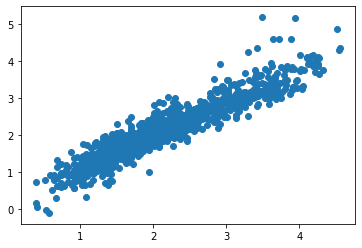

In [46]:
plt.scatter(y_test,predi)

# 2) K-Nearest Neighbours (KNN)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score


In [48]:
error_rate = []

# Will take some time
for i in range(1,15):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test))

Text(0, 0.5, 'Error Rate')

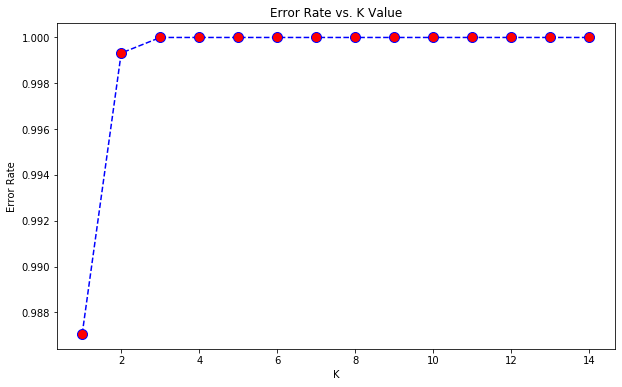

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
rmse_val = [] #to store rmse values for different k
accuracy=[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pre=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pre)) #calculate rmse
    accu= r2_score(y_test, pre)
    rmse_val.append(error) #store rmse values
    accuracy.append(accu)
    
    print('RMSE value for k= ' , K , 'is:', error)
    print('R2Score of k=',K, 'is:', (accu*100))
    print('\n')
    

RMSE value for k=  1 is: 0.5979118505807488
R2Score of k= 1 is: 38.47507346841351


RMSE value for k=  2 is: 0.5238080942885835
R2Score of k= 2 is: 52.78052091055915


RMSE value for k=  3 is: 0.49353869070116296
R2Score of k= 3 is: 58.08020109382965


RMSE value for k=  4 is: 0.4842854598784452
R2Score of k= 4 is: 59.637352838113245


RMSE value for k=  5 is: 0.4816331742583922
R2Score of k= 5 is: 60.07825031797977


RMSE value for k=  6 is: 0.4822171047835633
R2Score of k= 6 is: 59.981389632646945


RMSE value for k=  7 is: 0.47960230646210944
R2Score of k= 7 is: 60.41421082444123


RMSE value for k=  8 is: 0.47849341572595
R2Score of k= 8 is: 60.597052182258146


RMSE value for k=  9 is: 0.4769991333053545
R2Score of k= 9 is: 60.84277007001895


RMSE value for k=  10 is: 0.480987459602564
R2Score of k= 10 is: 60.18522292785735


RMSE value for k=  11 is: 0.48277527962123606
R2Score of k= 11 is: 59.88869151355828


RMSE value for k=  12 is: 0.4863322078645263
R2Score of k= 12 is: 59.

#### For K=9 it has maximum r2score compared to other K values
### Accuracy is around 60% for K=9

# 3) Decision Trees

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
r2score=r2_score(y_test, dtree_pred)

print("Mean Absolute Error: " + str(mean_absolute_error(dtree_pred, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(dtree_pred, y_test)))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print("\n")
print("R2-Score:",r2score)
print("Accuracy: %.2f%%" % (r2score * 100.0))


Mean Absolute Error: 0.1595738259531126
Mean Squared Error : 0.051550546412069256
Root Mean Square Error: 0.22704745409730817


R2-Score: 0.9112823449195744
Accuracy: 91.13%


# 4) Random Forests

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
r2score=r2_score(y_test, rfc_pred)

print("Mean Absolute Error: " + str(mean_absolute_error(rfc_pred, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(rfc_pred, y_test)))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, rfc_pred)))
print("\n")
print("R2-Score:",r2score)
print("Accuracy: %.2f%%" % (r2score * 100.0))


Mean Absolute Error: 0.11852868808451145
Mean Squared Error : 0.028164464702758643
Root Mean Square Error: 0.16782271807701912


R2-Score: 0.9515294126069794
Accuracy: 95.15%


# 5) SVM (Support Vector Machine)

In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
np.random.seed(21)
svr=SVR()
param_grid = {'C': [1,10], 'gamma': [0.000001,0.0000001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
r2score=r2_score(y_test, grid_predictions)


print("Mean Absolute Error: " + str(mean_absolute_error(grid_predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(grid_predictions, y_test)))
print("\n")
print("R2-Score:",r2score)
print("Accuracy: %.2f%%" % (r2score * 100.0))



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, gamma=1e-06, kernel=rbf ....................................


C:\Users\navee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=1e-06, kernel=rbf, score=0.588, total=   2.3s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ........ C=1, gamma=1e-06, kernel=rbf, score=0.581, total=   2.2s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] ........ C=1, gamma=1e-06, kernel=rbf, score=0.549, total=   2.1s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ........ C=1, gamma=1e-07, kernel=rbf, score=0.635, total=   1.6s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ........ C=1, gamma=1e-07, kernel=rbf, score=0.644, total=   1.6s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ........ C=1, gamma=1e-07, kernel=rbf, score=0.582, total=   1.6s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-06, kernel=rbf, score=0.575, total=   3.5s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-06, kernel=rbf, score=0.577, total=   3.3s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-06, kernel=rbf, score=0.529, total=   3.5s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   28.4s finished


Mean Absolute Error: 0.3418775480637112
Mean Squared Error : 0.1935772231148541


R2-Score: 0.666856735630848
Accuracy: 66.69%


# 6) XGBoost Algorithm

### XGBoost gave best accuracy and faster than many other regression algorithms

In [54]:
from xgboost import XGBRegressor

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [56]:
xgb=XGBRegressor(n_estimators=100000,learning_rate=0.10)
xgb.fit(X_train, y_train, 
             early_stopping_rounds=100, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

predictions = xgb.predict(X_test)
r2score=r2_score(y_test, predictions)

print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))
print("Mean Squared Log Error : " + str(mean_squared_log_error(predictions, y_test)))
print("\n")
print("R2-Score:",r2score)
print("Accuracy: %.2f%%" % (r2score * 100.0))


Mean Absolute Error: 0.09937602135091507
Mean Squared Error : 0.02025723572416433
Mean Squared Log Error : 0.0022752749876294143


R2-Score: 0.9651376255550509
Accuracy: 96.51%


### * Out of all algorithms, XGBoost gives best accuracy and faster in computation*

#### So I will predict the price of used cars ( from the dataset 'Data_Test.xlsx') using this algorithm and store in a excel file named 'My_predictions.xlsx'


In [57]:
predict = xgb.predict(data_test)
print(predict)

[1.3933568 1.4557662 2.8802383 ... 1.3459197 1.7688302 2.9736257]


In [58]:
data_test['Predicted Price']=predict

In [59]:
data_test.head()  # the 'Predicted Price' column is added to the dataset at the last column

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,...,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Predicted Price
0,2014,40929,3,0,1,32.26,998.0,58.20,4.0,18,...,0,0,1,0,0,0,0,0,0,1.393357
1,2013,54493,1,0,2,24.70,796.0,47.30,5.0,18,...,0,1,0,0,0,0,0,0,0,1.455766
2,2017,34000,0,0,1,13.68,2393.0,147.80,7.0,28,...,0,0,0,0,0,0,0,1,0,2.880238
4,2014,29000,1,0,1,18.50,1197.0,82.85,5.0,10,...,0,0,0,0,0,0,0,1,0,1.680206
5,2016,85609,0,0,2,16.00,2179.0,140.00,7.0,17,...,0,1,0,0,0,0,0,0,0,2.622223


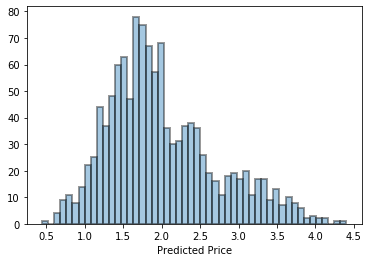

In [60]:
sns.distplot(data_test['Predicted Price'],kde=False, bins=50,hist_kws=dict(edgecolor="k", linewidth=2))

# The End